In [1]:
#This notebook runs on MachineLearningCourse enviroment (for libraries version)
#numpy 1.21.5
#pandas 1.4.1
#matplotlib 3.5.1
#sci-kit learn 1.0.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset= pd.read_csv("HousePrices.csv")
print(dataset.info())  
#Conclusion: 414 entries and there isn't a null value to be imputed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    object 
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
None


In [4]:
print(dataset.head())

  transaction date  house age  distance to the nearest MRT station  \
0         2012-917       32.0                             84.87882   
1         2012-917       19.5                            306.59470   
2         2013-583       13.3                            561.98450   
3           2013-5       13.3                            561.98450   
4         2012-833        5.0                            390.56840   

   number of convenience stores  latitude  longitude  house price of unit area  
0                            10  24.98298  121.54024                      37.9  
1                             9  24.98034  121.53951                      42.2  
2                             5  24.98746  121.54391                      47.3  
3                             5  24.98746  121.54391                      54.8  
4                             5  24.97937  121.54245                      43.1  


In [5]:
# some information about the values in transaction date
print(dataset['transaction date'].value_counts())
#Conclusion:
#transaction date (only object-type column in dataset) doesnt have a dominating category so i can't split the values 
#into 2 columns :(1) the dominating category and (2)others to be dummied after 

2013-417    58
2013-5      47
2013-083    46
2012-917    38
2013-25     32
2012-833    31
2012-667    30
2013-333    29
2013        28
2012-75     27
2013-167    25
2013-583    23
Name: transaction date, dtype: int64


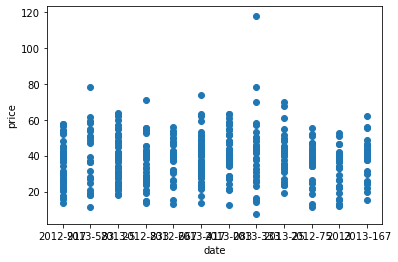

In [6]:
plt.scatter(dataset['transaction date'],dataset['house price of unit area'])
plt.xlabel('date', fontsize = 10)
plt.ylabel('price', fontsize = 10)
plt.show()
#Conclusion: it will be really hard to fit a staright line through this particular feature because they are making vertical 
#lines, if a straight line passes through them its slope will be = infinity -> not possible -> need to find workaround
#Conclusion 2: there is a point that maybe an outlier (117.5) -> need to check outliers in general

In [7]:
print(pd.get_dummies(dataset['transaction date']))
#Conclusion: good approach but 12 dummy variables and this is a univariable linear regression model

     2012-667  2012-75  2012-833  2012-917  2013  2013-083  2013-167  2013-25  \
0           0        0         0         1     0         0         0        0   
1           0        0         0         1     0         0         0        0   
2           0        0         0         0     0         0         0        0   
3           0        0         0         0     0         0         0        0   
4           0        0         1         0     0         0         0        0   
..        ...      ...       ...       ...   ...       ...       ...      ...   
409         0        0         0         0     1         0         0        0   
410         1        0         0         0     0         0         0        0   
411         0        0         0         0     0         0         0        1   
412         0        0         0         0     1         0         0        0   
413         0        0         0         0     0         0         0        0   

     2013-333  2013-417  20

In [8]:
#Taking only the year part as the transaction date
for row in range(len(dataset['transaction date'])):
        year =  int(dataset['transaction date'][row][:4])
        dataset['transaction year']= year
dataset = dataset.drop('transaction date',axis = 1)
print(dataset['transaction year'])

0      2013
1      2013
2      2013
3      2013
4      2013
       ... 
409    2013
410    2013
411    2013
412    2013
413    2013
Name: transaction year, Length: 414, dtype: int64


In [9]:
print(dataset)

     house age  distance to the nearest MRT station  \
0         32.0                             84.87882   
1         19.5                            306.59470   
2         13.3                            561.98450   
3         13.3                            561.98450   
4          5.0                            390.56840   
..         ...                                  ...   
409       13.7                           4082.01500   
410        5.6                             90.45606   
411       18.8                            390.96960   
412        8.1                            104.81010   
413        6.5                             90.45606   

     number of convenience stores  latitude  longitude  \
0                              10  24.98298  121.54024   
1                               9  24.98034  121.53951   
2                               5  24.98746  121.54391   
3                               5  24.98746  121.54391   
4                               5  24.97937  121.

In [10]:
#Finding outliers using interquartile range 
def get_outliers_boundaries(feature):
    first_quartile = np.percentile(feature,25)
    third_quartile = np.percentile(feature,75)
    interquartile_range = third_quartile - first_quartile
    min_num = first_quartile - 1.5 * interquartile_range
    max_num = third_quartile + 1.5 * interquartile_range
    #in this problem, I cant have any negative lower boundary
    if min_num < 0:
        min_num = 0
    return min_num,max_num

In [11]:
print(dataset.columns[-2])

house price of unit area


In [12]:
print(dataset.shape)
print(dataset[dataset.columns[-2]].max())

(414, 7)
117.5


In [13]:
min_num,max_num = get_outliers_boundaries(dataset[dataset.columns[-2]])
print(min_num)
print(max_num)
for i in range(len(dataset[dataset.columns[-2]])):
    if  dataset[dataset.columns[-2]][i]< min_num or dataset[dataset.columns[-2]][i] > max_num:
        dataset = dataset.drop(i,axis=0)

0
74.95


In [14]:
print(dataset.shape)
print(dataset[dataset.columns[-2]].max())

(411, 7)
73.6


In [15]:
#Normalizing values using sigmoid function as it ranges from 0->1
#Conclusion : in latitude and longitude, after normalizing the value they all become (1.0) making a vertical line
#so I will try to scale them 
featureScaler = MinMaxScaler()
to_scale_list = ['distance to the nearest MRT station','latitude','longitude']
for feature in to_scale_list:
    dataset[feature]= featureScaler.fit_transform(np.array(dataset[feature]).reshape(dataset.shape[0],1))

In [16]:
print(dataset)

     house age  distance to the nearest MRT station  \
0         32.0                             0.009513   
1         19.5                             0.043809   
2         13.3                             0.083315   
3         13.3                             0.083315   
4          5.0                             0.056799   
..         ...                                  ...   
409       13.7                             0.627820   
410        5.6                             0.010375   
411       18.8                             0.056861   
412        8.1                             0.012596   
413        6.5                             0.010375   

     number of convenience stores  latitude  longitude  \
0                              10  0.616941   0.719323   
1                               9  0.584949   0.711451   
2                               5  0.671231   0.758896   
3                               5  0.671231   0.758896   
4                               5  0.573194   0.7

In [17]:
def hypothesis(x,y):
    feature = np.array(dataset[x]).reshape(dataset[x].shape[0],1)
    label = np.array(dataset[y]).reshape(dataset[y].shape[0],1)
    model = LinearRegression()
    model.fit(feature,label)
    predictions = model.predict(feature)
    MSE = metrics.mean_squared_error(label,predictions)
    plt.scatter(dataset[x],dataset[y])
    plt.xlabel(x)
    plt.ylabel(dataset.columns[-2])
    plt.plot(dataset[x],predictions,color='red',linewidth = 4)
    plt.show()
    return MSE

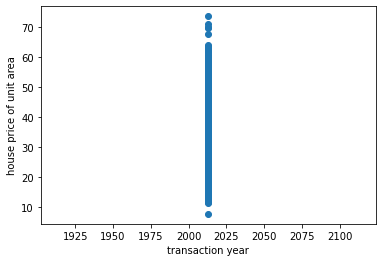

162.64848775463088


In [18]:
#the line is not obvious because the difference between the x axis points is very large
MSE_transaction_date = hypothesis(dataset.columns[-1],dataset.columns[-2])
print(MSE_transaction_date)

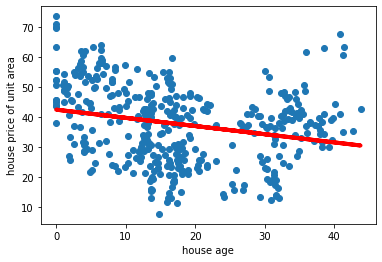

153.0559919741399


In [19]:
MSE_house_age = hypothesis(dataset.columns[0],dataset.columns[-2])
print(MSE_house_age)

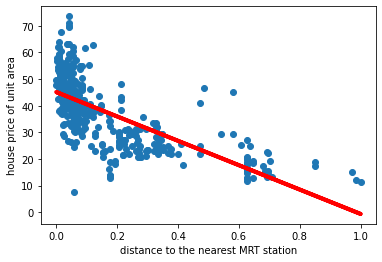

82.6432129308194


In [20]:
MSE_distance_to_MRT_station = hypothesis(dataset.columns[1],dataset.columns[-2])
print(MSE_distance_to_MRT_station)

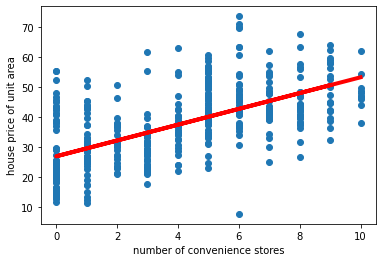

102.94708718321607


In [21]:
MSE_num_convenience_stores = hypothesis(dataset.columns[2],dataset.columns[-2])
print(MSE_num_convenience_stores)

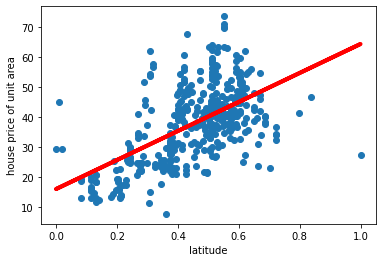

109.46061446401903


In [22]:
MSE_latitude = hypothesis(dataset.columns[3],dataset.columns[-2])
print(MSE_latitude)

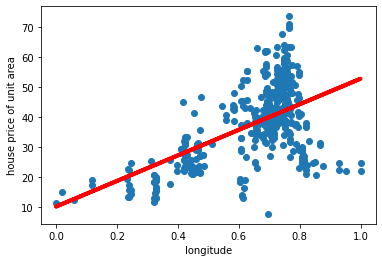

112.62355306955502


In [23]:
MSE_longitude = hypothesis(dataset.columns[4],dataset.columns[-2])
print(MSE_longitude)

In [24]:
#Seeing the diffrerence between processed and unprocessed data
unprocessed_dataset=pd.read_csv("assignment1_dataset.csv")
print(unprocessed_dataset)

    transaction date  house age  distance to the nearest MRT station  \
0           2012-917       32.0                             84.87882   
1           2012-917       19.5                            306.59470   
2           2013-583       13.3                            561.98450   
3             2013-5       13.3                            561.98450   
4           2012-833        5.0                            390.56840   
..               ...        ...                                  ...   
409             2013       13.7                           4082.01500   
410         2012-667        5.6                             90.45606   
411          2013-25       18.8                            390.96960   
412             2013        8.1                            104.81010   
413           2013-5        6.5                             90.45606   

     number of convenience stores  latitude  longitude  \
0                              10  24.98298  121.54024   
1                  

In [25]:
def unprocessed_hypothesis(x,y):
    feature = np.array(unprocessed_dataset[x]).reshape(unprocessed_dataset[x].shape[0],1)
    label = np.array(unprocessed_dataset[y]).reshape(unprocessed_dataset[y].shape[0],1)
    model = LinearRegression()
    model.fit(feature,label)
    predictions = model.predict(feature)
    MSE = metrics.mean_squared_error(label,predictions)
    plt.scatter(unprocessed_dataset[x],unprocessed_dataset[y])
    plt.xlabel(x)
    plt.ylabel(unprocessed_dataset.columns[-2])
    plt.plot(unprocessed_dataset[x],predictions,color='red',linewidth = 4)
    plt.show()
    return MSE

In [26]:
for row in range(len(unprocessed_dataset['transaction date'])):
        year =  int(unprocessed_dataset['transaction date'][row][:4])
        unprocessed_dataset['transaction year']= year
unprocessed_dataset = unprocessed_dataset.drop('transaction date',axis = 1)
print(unprocessed_dataset['transaction year'])

0      2013
1      2013
2      2013
3      2013
4      2013
       ... 
409    2013
410    2013
411    2013
412    2013
413    2013
Name: transaction year, Length: 414, dtype: int64


In [27]:
print(unprocessed_dataset)

     house age  distance to the nearest MRT station  \
0         32.0                             84.87882   
1         19.5                            306.59470   
2         13.3                            561.98450   
3         13.3                            561.98450   
4          5.0                            390.56840   
..         ...                                  ...   
409       13.7                           4082.01500   
410        5.6                             90.45606   
411       18.8                            390.96960   
412        8.1                            104.81010   
413        6.5                             90.45606   

     number of convenience stores  latitude  longitude  \
0                              10  24.98298  121.54024   
1                               9  24.98034  121.53951   
2                               5  24.98746  121.54391   
3                               5  24.98746  121.54391   
4                               5  24.97937  121.

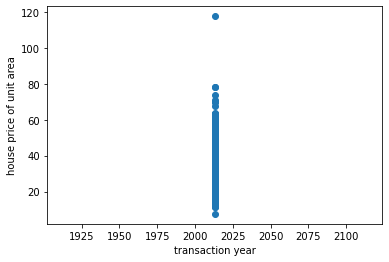

184.68931783705574


In [28]:
MSE_transaction_date_unprocessed = unprocessed_hypothesis(unprocessed_dataset.columns[-1],unprocessed_dataset.columns[-2])
print(MSE_transaction_date_unprocessed)

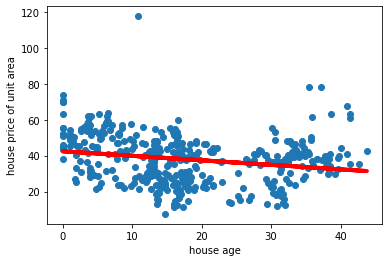

176.50047403131393


In [29]:
MSE_house_age_unprocessed = unprocessed_hypothesis(unprocessed_dataset.columns[0],unprocessed_dataset.columns[-2])
print(MSE_house_age_unprocessed)

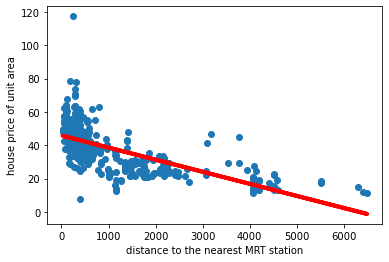

100.88574959799587


In [30]:
MSE_distance_to_MRT_station_unprocessed= unprocessed_hypothesis(unprocessed_dataset.columns[1],unprocessed_dataset.columns[-2])
print(MSE_distance_to_MRT_station_unprocessed)

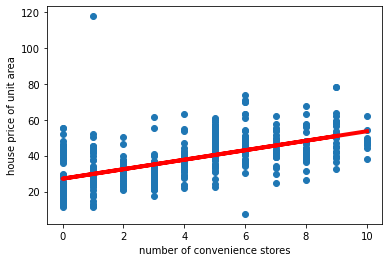

124.47199212769486


In [31]:
MSE_num_convenience_stores_unprocessed = unprocessed_hypothesis(unprocessed_dataset.columns[2],unprocessed_dataset.columns[-2])
print(MSE_num_convenience_stores_unprocessed)

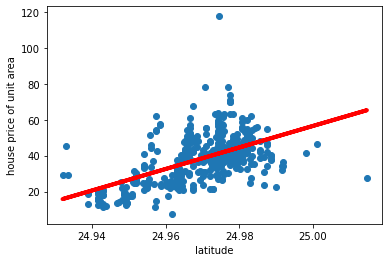

129.56861389100305


In [32]:
MSE_latitude_unprocessed= unprocessed_hypothesis(unprocessed_dataset.columns[3],unprocessed_dataset.columns[-2])
print(MSE_latitude_unprocessed)

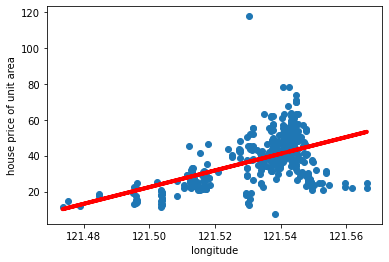

134.11606939001436


In [33]:
MSE_longitude_unprocessed= unprocessed_hypothesis(unprocessed_dataset.columns[4],unprocessed_dataset.columns[-2])
print(MSE_longitude_unprocessed)